# The Sparks Foundation (Graduate Rotational Internship Program)
### Name : Yash Vora
### Date : September, 2021
<hr>

# Task #2 : Prediction using Unsupervised ML
### Problem Statement : Using K-Means clustering to predict optimum number of cluster and represent it visually with iris dataset.
### Dataset Link : https://bit.ly/3kXTdox

### There are six columns in this dataset,
- <i>id</i>
- <i>SepalLengthCm</i> - Length of sepal(in cm).
- <i>SepalWidthCm</i> - Width of sepal(in cm).
- <i>PetalLengthCm</i> - Length of petal(in cm).
- <i>PetalWidthCm</i> - Width of petal(in cm).
- <i>Species</i> - Specie name.

## Import Required Libraries

In [1]:
# For Data Analysis
import pandas as pd

# For Mathematical Operations
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# For Model Creation
from sklearn.cluster import KMeans

# For Model Evaluation
from sklearn.metrics import silhouette_score

## Load Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Dropping Id and Species column as it is not needed

In [3]:
df = df.drop(['Id','Species'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Statistical analysis of the data

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Basic information of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Check null values

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

## Pairplot for multivariate analysis

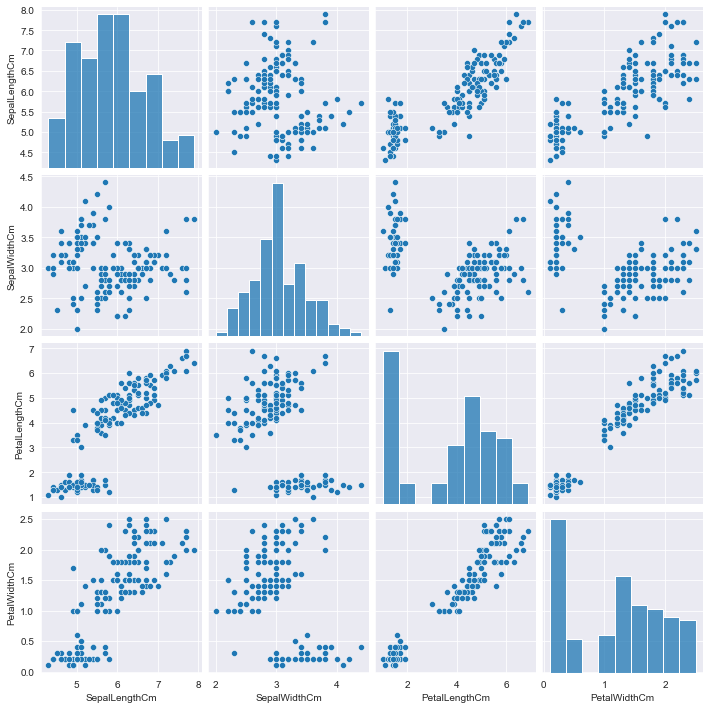

In [7]:
sns.pairplot(df)

## Elbow method for finding optimum number of cluster

In [8]:
# Function for calculating optimum number of cluster
def optimum_k_value(df):
    wcss = []
    
    for i in range(1,11):
        km = KMeans(n_clusters=i,random_state=0)
        km.fit(df)
        wcss.append(km.inertia_)
        
    # Plot line graph for elbow method
    plt.figure(figsize=(7,7))
    plt.title('The Elbow Method')
    plt.xlabel('No of clusters')
    plt.ylabel('WCSS')
    plt.plot(range(1,11),wcss)
    plt.show()

In [9]:
import warnings
warnings.filterwarnings('ignore')

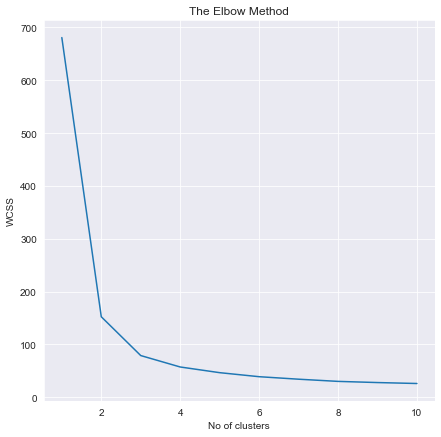

In [10]:
# Optimum number of cluster
optimum_k_value(df)

As you can see above in 'Elbow Method' after 3 cluster wcss value doesn't decreases significantly with each iteration.<br>

From this we choose the number of clusters as 3.

## Building model with 3 cluster

In [11]:
km = KMeans(n_clusters=3,random_state=0)
km.fit(df)

KMeans(n_clusters=3, random_state=0)

## Finding which value is assigned to which cluster

In [12]:
y_pred = km.fit_predict(df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [13]:
df['cluster'] = y_pred
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Cluster centroid

In [14]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## Presenting how cluster along with centroid is made visually

In [15]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

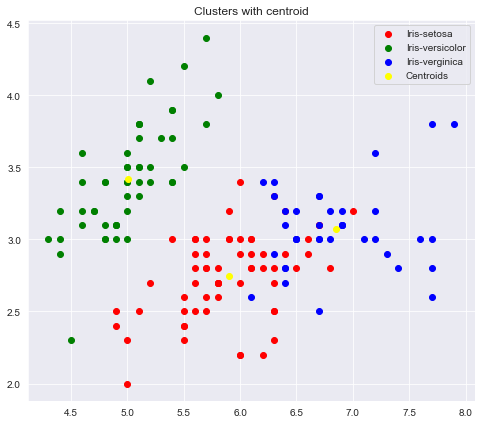

In [16]:
# Visualizing clusters for first two columns
plt.figure(figsize=(8,7))
plt.title('Clusters with centroid')

# Visualizing clusters
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], color = 'red', label = 'Iris-setosa')
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], color = 'green', label = 'Iris-versicolor')
plt.scatter(df3['SepalLengthCm'], df3['SepalWidthCm'], color = 'blue', label = 'Iris-verginica')

# Visualizating centroid
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

## Model Evaluation

### Silhouette_Score

In [17]:
score = silhouette_score(df,y_pred)
score

0.684936462996038

If you have any queries regarding this solution then please write it below in the comment box and also share your thougths.

## ---------------------------------------------------------Thank You-----------------------------------------------------